In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Câu hỏi 5:

### 5.1 Nội dung câu hỏi:
- Xu hướng thay đổi của các chỉ số qua các thế hệ như thế nào?


### 5.2 Lợi ích khi trả lời câu hỏi:
- Hiểu rõ sự phát triển của Pokemon qua thời gian.
- Phát hiện ra tính cách đặc trưng của mỗi thế hệ.
- Hiểu rõ về sự thay đổi của mỗi chủng loài.
- Đưa ra thông tin hữu ích cho cộng đồng Pokemon.
- Tạo ra nội dung hấp dẫn cho người chơi.
- Nếu bạn đang phát triển hoặc quản lý trò chơi Pokémon, việc biết rõ về xu hướng có thể giúp bạn lập kế hoạch cho sự xuất hiện của các Pokémon và điều chỉnh độ khó của trò chơi theo thời gian.
- Nếu bạn có dữ liệu từ các thế hệ Pokémon hiện tại, bạn có thể sử dụng xu hướng để dự đoán sự phát triển tương lai. Điều này có thể hữu ích trong việc định hình chiến lược cho các phiên bản Pokémon sắp tới.



### 5.3 Bước tiền xử lý:
- Kiểm tra dữ liệu thô
- Xử lí giá trị trống
- Kiểm tra dữ liệu trùng lặp
- Kiểm tra các định dạng dữ liệu 
- Kiểm tra sự liên kết giữa các thuộc tính

### 5.4 Bước phân tích:
- Tạo một Dataframe để chưa các thuộc tính cần xét xu hướng.
- Tính trung bình các thuộc tính đấy trong mỗi thế hệ. 
- vẽ biểu đồ xu hướng để thấy rõ.

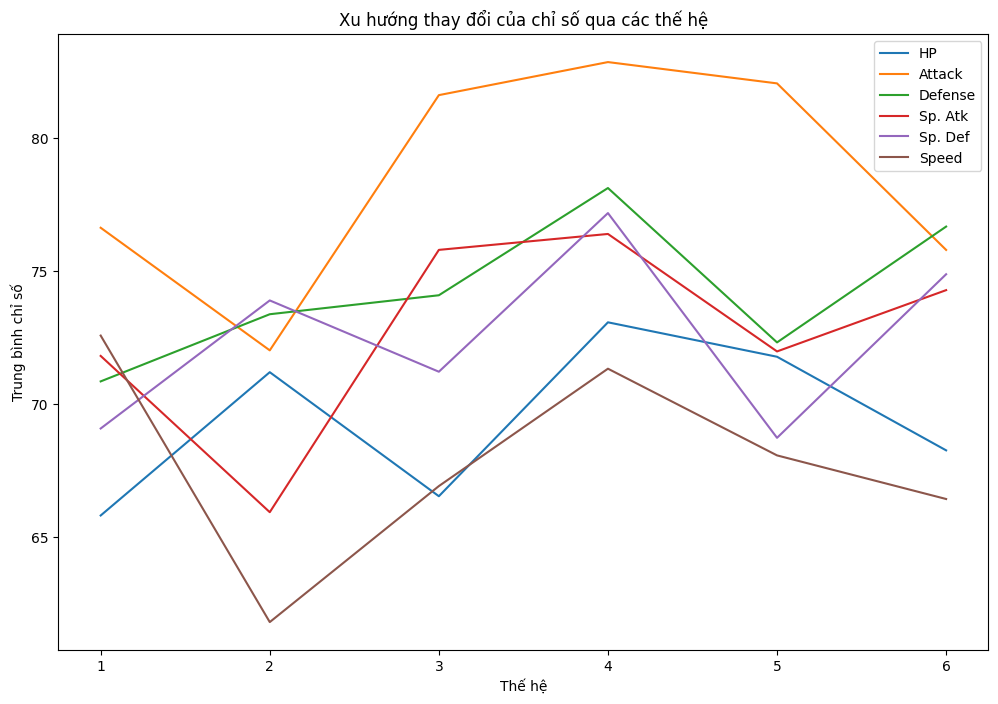

In [3]:
pokemon_data = df
columns_of_interest = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

selected_columns_df = pokemon_data[columns_of_interest]

average_stats_by_generation = selected_columns_df.groupby('Generation').mean()

plt.figure(figsize=(12, 8))
for stat in columns_of_interest[:-1]:  # Loại bỏ cột 'Generation' khỏi danh sách vì chúng ta sẽ vẽ theo thế hệ
    plt.plot(average_stats_by_generation.index, average_stats_by_generation[stat], label=stat)

plt.xlabel('Thế hệ')
plt.ylabel('Trung bình chỉ số')
plt.title('Xu hướng thay đổi của chỉ số qua các thế hệ')
plt.legend()
plt.show()

### 5.5 Nhận xét
- Ở gen 4 có xu hướng tăng tất cả các chỉ số.
- Và sau đó có xu hướng giảm ở gen 5.
- Nhìn chung thì Pokemon có trung bình chỉ số cao nhất ở gen 4 và thấp nhất ở gen 2.

# Câu hỏi 6:

### 6.1 Nội dung câu hỏi:
- Với mỗi loại Pokemon thì phân phối chỉ số như thế nào? Từ đó chỉ ra chỉ số nào là đặc trưng.

### 6.2 Lợi ích khi trả lời câu hỏi:
- Phân biệt được sức mạnh riêng của mỗi hệ, từ đó cung cấp thông tin về dặc tính và khả năng chiến đấu của từng loại.
- Xây dựng chiến lược huấn luyện hiệu quả, chẳng hạn như chọn lựa Pokemon có chỉ số mạnh mẽ để tham gia các trận đấu.
- Các thông tin về chỉ số cao nhất có thể được sử dụng để hỗ trợ quyết định trong việc chọn lựa Pokémon trong trò chơi hoặc các sự kiện thi đấu Pokémon.
- Câu hỏi này có thể là bước khởi đầu cho nhiều nghiên cứu và phân tích chi tiết hơn về mối quan hệ giữa loại Pokémon và chỉ số của chúng

### 6.3 Bước tiền xử lý:
- Kiểm tra dữ liệu thô
- Xử lí giá trị trống
- Kiểm tra dữ liệu trùng lặp
- Kiểm tra các định dạng dữ liệu 
- Kiểm tra sự liên kết giữa các thuộc tính

### 6.4 Bước phân tích:
- Melt DataFrame để tạo dữ liệu dạng "long" cho boxplot.
- Tạo boxplot.
- Nhìn theo plot để chỉ ra chỉ số đặc trưng cho mỗi hệ.

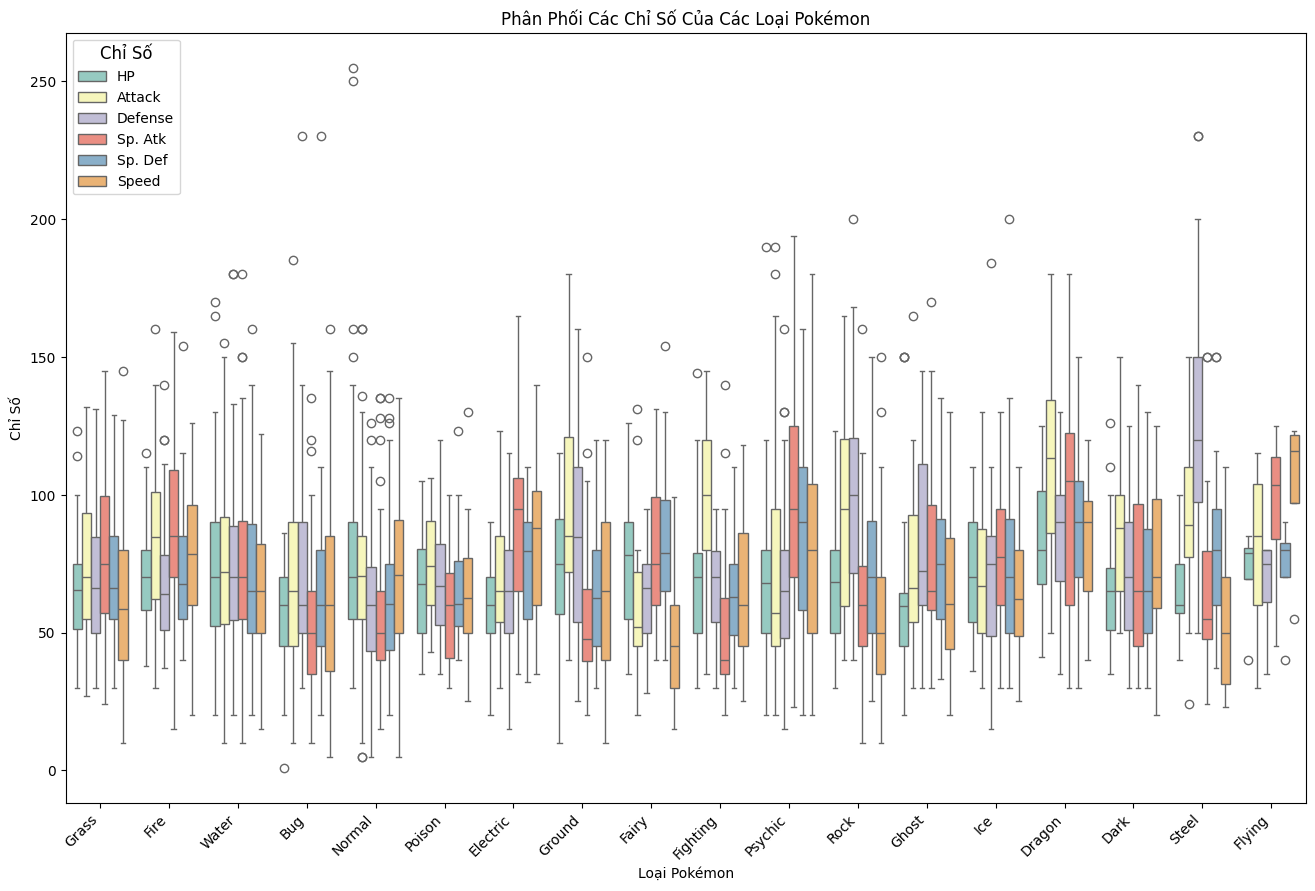

In [4]:
selected_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

df_melted = pd.melt(pokemon_data, id_vars=['Type 1'], value_vars=selected_columns, var_name='Stat', value_name='Value')

plt.figure(figsize=(16, 10))
sns.boxplot(x='Type 1', y='Value', hue='Stat', data=df_melted, palette='Set3')
plt.title('Phân Phối Các Chỉ Số Của Các Loại Pokémon')
plt.xlabel('Loại Pokémon')
plt.ylabel('Chỉ Số')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Chỉ Số', title_fontsize='12')
plt.show()

### 6.5 Nhận xét
- Với hệ Grass, Fire thì thiên về Tấn công và Tấn công đặc biệt.
- Với hệ Water, Ice thì chỉ số khá đồng đều, không cao cũng không thấp.
- Với hệ Bug thì chỉ số thấp ở Máu và Tấn công đặc biệt.
- Với hệ Normal thì chỉ số cao ở Máu và Tốc độ.
- Với hệ Poison thì chỉ số cao ở Tấn công và thấp ở Tấn công đặc biệt.
- Với hệ Electric thì chỉ số cao ở Tấn công đặc biệt và Tốc độ.
- Với hệ Ground thì chỉ số cao ở Tấn công và Phòng thủ, thay vào đó thì Tấn công đặc biệt và Phòng thủ đặc biệt thấp.
- Với hệ Fairy thì chỉ số cao ở Tấn công đặc biệt và Phòng thủ đặc biệt, thấp ở Tấn công và rất thấp ở Tốc độ.
- Với hệ Fighting thì cao ở Tấn công.
- Với hệ Psychic thì cao ở Tấn công đặc biệt và phòng ngự đặc biệt.
- Với hệ Rock thi cao ở Tấn công và Phòng thủ, Thấp ở Máu, Tấn công đặc biệt và Tốc độ.
- Với hệ Ghost thì thấp ở chỉ số Máu nhưng chỉ số Phòng ngự cao.
- Với hệ Dragon thì chỉ số cao ở Tấn công và Tấn công đặc biệt.
- Với hệ Dark thì chỉ số khá đồng đều nhưng thấp ở Máu.
- Với hệ Steel thì chỉ số Phòng ngự rất cao dù Máu thấp.
- Với hệ Flying thì chỉ số Tấn công, Tấn công đặc biệt và Tốc độ cao. 